In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 데이터 생성

In [2]:
means = [(2,2), (-2,-2)]
covs = [[[2,0],[0,2]],[[2,0],[0,2]]]

In [3]:
class_1 = np.random.multivariate_normal(means[0], covs[0], 500)
class_2 = np.random.multivariate_normal(means[1], covs[1], 500)

In [4]:
label_1 = np.ones(500)
label_2 = -1*np.ones(500)

In [5]:
datax = np.concatenate((class_1,class_2), axis=0)
datay = np.concatenate((label_1,label_2), axis=0)

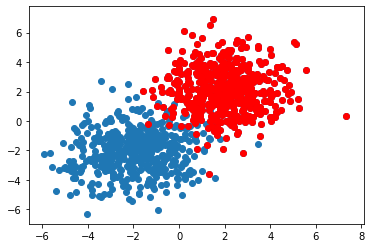

In [6]:
plt.scatter(datax[:,0], datax[:,1])
plt.scatter(class_1[:,0], class_1[:,1], c="red")

In [7]:
print(datax.shape)
print(datay.shape)

(1000, 2)
(1000,)


### 데이터 나누기(Train, Test)

In [8]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(datax, datay, test_size=0.3, random_state=500)

In [9]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(700, 2)
(300, 2)
(700,)
(300,)


### GaussianNB로 Classifier 생성

In [10]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(train_x,train_y)
predict_1 = bayes.predict(test_x)

### prior를 변경하여 분류기 생성

In [11]:
bayes_prior = GaussianNB(priors=[0.2, 0.8])
bayes_prior.fit(train_x, train_y)
predict_2 = bayes_prior.predict(test_x)

### 그림으로 표현

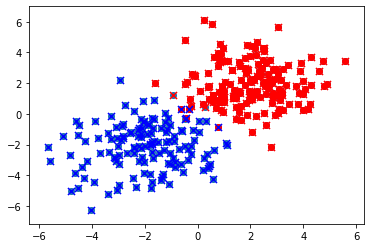

In [12]:
#prior가 동일한 경우
plt.scatter(test_x[:,0], test_x[:,1])
plt.scatter(test_x[np.where(test_y==1),0], test_x[np.where(test_y==1),1], c="red")
plt.scatter(test_x[np.where(predict_1==1),0], test_x[np.where(predict_1==1),1], c="red", marker='x', s=50)
plt.scatter(test_x[np.where(predict_1==-1),0], test_x[np.where(predict_1==-1),1], c="blue", marker='x',s=50)

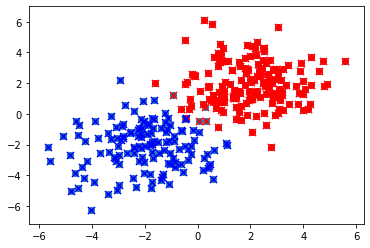

In [13]:
#prior가 0.2, 0.8인 경우
plt.scatter(test_x[:,0], test_x[:,1])
plt.scatter(test_x[np.where(test_y==1),0], test_x[np.where(test_y==1),1], c="red")
plt.scatter(test_x[np.where(predict_2==1),0], test_x[np.where(predict_2==1),1], c="red", marker='x', s=50)
plt.scatter(test_x[np.where(predict_2==-1),0], test_x[np.where(predict_2==-1),1], c="blue", marker='x',s=50)

### 정확도 확인

In [14]:
# prior가 동일한 경우
dif = test_y - predict_1
accuracy_1 = 1 - (np.size(np.where(dif != 0))/np.size(test_y))
print(accuracy_1)

0.98


In [15]:
# prior가 0.2, 0.8인 경우
dif = test_y - predict_2
accuracy_2 = 1 - (np.size(np.where(dif != 0))/np.size(test_y))
print(accuracy_2)

0.9833333333333333
